In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold

/Users/nikhil/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


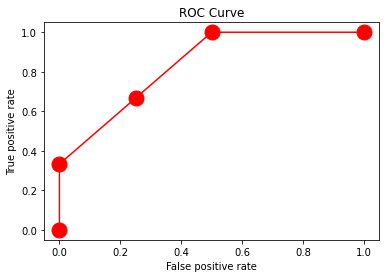

In [2]:
# Section 1 q5 (a)

x = [0, 0, 1/4, 2/4, 4/4]
y = [0, 2/6, 4/6, 6/6, 6/6]

plt.plot(x, y, marker='o', markerfacecolor='red', markersize=15, color='red')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

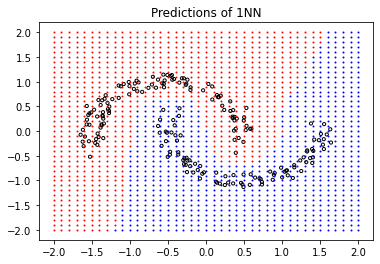

In [3]:
# Section 2 q1

# reading data, creating features and labels
data = pd.read_csv('hw3Data/D2z.txt', sep=" ", header=None)
data.columns = ['x1','x2','y']
X = data[['x1','x2']].values
y = data['y'].values

# produce test points
x1_values = np.arange(-2, 2.1, 0.1)
x2_values = np.arange(-2, 2.1, 0.1)
x_, y_ = np.meshgrid(x1_values,x2_values)
test_points = np.c_[x_.ravel(),y_.ravel()]

# fit classifier
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X, y)

# predict labels
preds = KNN.predict(test_points).reshape(x_.shape)

# plot
test_point_size = 10
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='none', edgecolors='black', s=test_point_size)
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='none', edgecolors='black', s=test_point_size)
    
for i in range(preds.shape[0]): # plot individual test points based on classification
    for j in range(preds.shape[1]):
        if preds[i,j] == 0:
            plt.plot(x_[i,j],y_[i,j], 'o', color='blue', markersize=1)
        else:
            plt.plot(x_[i,j],y_[i,j], 'o', color='red', markersize=1)

plt.title('Predictions of 1NN')
plt.show()

In [4]:
data = pd.read_csv('hw3Data/emails.csv')

In [5]:
# Section 2 q2

# features and labels
X = data.drop(['Email No.', 'Prediction'], axis=1)
y = data['Prediction']

# KFold
KF = KFold(n_splits = 5, shuffle=True, random_state=68)

# Calculating accuracy, precison and recall for each fold 
accuracy_scores = []
precision_scores = []
recall_scores = []

for train_i, test_i in KF.split(X):
    X_train, X_test = X.iloc[train_i], X.iloc[test_i]
    y_train, y_test = y.iloc[train_i], y.iloc[test_i]
    
    KNN = KNeighborsClassifier(n_neighbors = 1)
    KNN.fit(X_train, y_train)
    preds = KNN.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, preds))
    precision_scores.append(precision_score(y_test, preds))
    recall_scores.append(recall_score(y_test, preds))
    
# print scores
for i in range(5):
    print(f'Fold {i+1} - Accuracy: {accuracy_scores[i]:.4f}, Precision: {precision_scores[i]:.4f}, Recall: {precision_scores[i]:.4f}\n')

Fold 1 - Accuracy: 0.8500, Precision: 0.6910, Recall: 0.6910

Fold 2 - Accuracy: 0.8840, Precision: 0.7601, Recall: 0.7601

Fold 3 - Accuracy: 0.8640, Precision: 0.7325, Recall: 0.7325

Fold 4 - Accuracy: 0.8680, Precision: 0.7530, Recall: 0.7530

Fold 5 - Accuracy: 0.8660, Precision: 0.7122, Recall: 0.7122

